# **Pseudo-random numbers**

**Assignment 1**: Complete the code below to generate a pseudorandom sequence based on the value of $\pi$

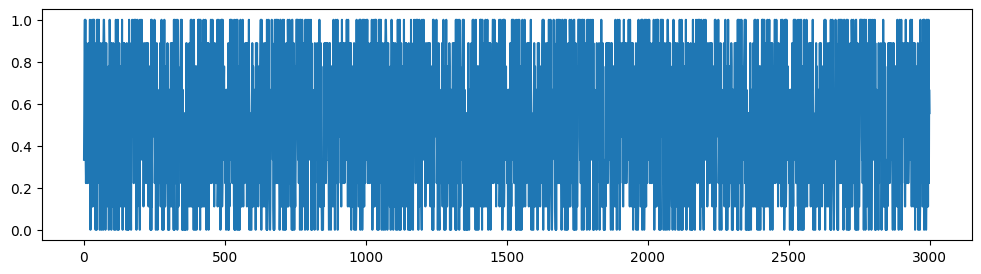

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Store the first 1000 digits of pi
pi = ("14159265358979323846264338327950288419716939937510"
    "58209749445923078164062862089986280348253421170679"
    "82148086513282306647093844609550582231725359408128"
    "48111745028410270193852110555964462294895493038196"
    "44288109756659334461284756482337867831652712019091"
    "45648566923460348610454326648213393607260249141273"
    "72458700660631558817488152092096282925409171536436"
    "78925903600113305305488204665213841469519415116094"
    "33057270365759591953092186117381932611793105118548"
    "07446237996274956735188575272489122793818301194912"
    "98336733624406566430860213949463952247371907021798"
    "60943702770539217176293176752384674818467669405132"
    "00056812714526356082778577134275778960917363717872"
    "14684409012249534301465495853710507922796892589235"
    "42019956112129021960864034418159813629774771309960"
    "51870721134999999837297804995105973173281609631859"
    "50244594553469083026425223082533446850352619311881"
    "71010003137838752886587533208381420617177669147303"
    "59825349042875546873115956286388235378759375195778"
    "18577805321712268066130019278766111959092164201989")

def randomGenerator(size=100, seed=0):
    """
    Input:
        size: length of the random sequence
        seed: seed for the sequence
    Output:
        seq: list with the random sequence
    """
    seq = []
    for i in range(size):
        ## WRITE YOUR CODE HERE
        seq.append(int(pi[seed]))
        seed = (seed+1) % 1000
        #----------------------
    return seq

seq = randomGenerator(3000, 8)
plt.figure(figsize=(12,3))
p = plt.plot(np.array(seq)/9)

**Assigment 2**: Complete the code below to count the number of times that appears each value.

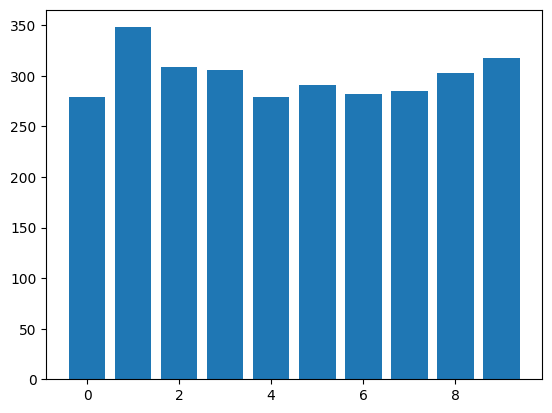

In [7]:
def freqCount(seq):
    """
    Input: random sequence (seq)
    Output: frequency count (freq)
    """
    freq = [0 for i in range(max(seq) + 1)]
    for i in seq:
        ## WRITE YOUR CODE HERE
        freq[i] += 1
        #----------------------
    return freq

freq = freqCount(seq)
p = plt.bar(range(max(seq) + 1), freq)

In [8]:
import datetime as dt

int(str(dt.datetime.now().microsecond)[:3])

376

## Moving Average

2801


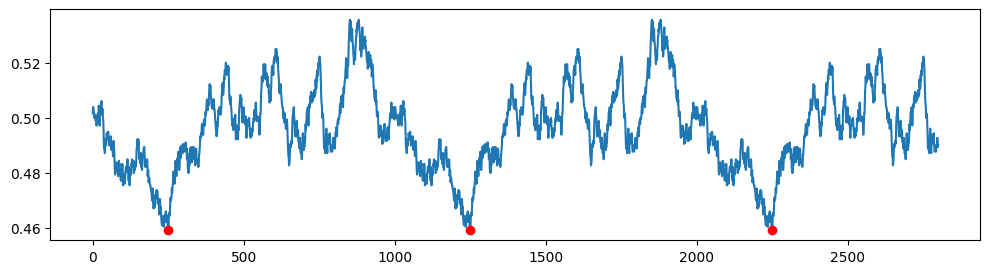

In [10]:
from scipy.ndimage import uniform_filter1d

arr = np.array(seq.copy())/9
window_size = 200
moving_averages = []

i = 0
while i < len(arr) - window_size + 1:
    window = arr[i : i + window_size]
    window_average = sum(window)/window_size
    moving_averages.append(window_average)
    i += 1

print(len(moving_averages))
plt.figure(figsize=(12,3))
plt.plot(moving_averages)
moving_averages = np.array(moving_averages)
minimum = np.where(moving_averages == moving_averages.min())[0]
p = plt.plot(minimum, moving_averages[minimum], 'or')

In [ ]:
avg_data = uniform_filter1d(arr, size=200)
print(len(avg_data))

plt.figure(figsize=(12,3))
p = plt.plot(avg_data)

## Linear congruential generator

 Implement a linear congruential generator ([LCG](https://en.wikipedia.org/wiki/Linear_congruential_generator))

$X_n = (a \cdot X_{n-1} + c) \text{ mod } m$

  - $a$: multiplier
  - $c$: increment
  - $m$: modulus
  - $X_0$: seed

LCG Theorem:

1. $m$ and $c$ are relatively prime
2. $a-1$ is divisible by every prime factor of $m$
3. If $m$ is a multiple of 4, then $a-1$ is a multiple of $4$

**Assignment 3**: Complete the code below to implement LCG.

In [ ]:
def lcg(seed=0, increment=1, multiplier=31, modulus=256, size=100):
    seq = [seed]
    for i in range(size-1):
        ## WRITE YOUR CODE HERE
        
        ## --------------------
    return seq

m = 80  # this will give us the cycle size in above conditions are met
c = 3
a = 21
X0 = 4
seq = lcg(seed=X0, increment=c, multiplier=a, modulus=m, size=400)
plt.figure(figsize=(12,3))
p = plt.plot(np.array(seq)/(m-1))

**Assigment 4**: Write a code to count the number of times that appears each value and plot the corresponding histogram.

In [ ]:
## WRITE YOUR CODE HERE

## --------------------

**Assignment 5**: Generate a sequence with the useful values given below.

In [ ]:
m = 2**32
a = 1103515245
c = 12345
X0 = dt.datetime.now().microsecond
size = 1000
## WRITE YOUR CODE HERE

## --------------------
plt.figure(figsize=(12,3))
p = plt.plot(np.array(X)/(m-1))

**Assignment 6**: Calculate the moving average of the last sequence and visually determine if there is any repeated pattern.

In [ ]:
## WRITE YOUR CODE HERE

## --------------------

## Overlapping Pairs

In [ ]:
def pairs(seq):
    """
    Returns Xi, Xi+1 point coordinates from sequence seq
    """
    N = len(seq)
    x_coord, y_coord = [], []
    for i in range(N - 1):
        x_coord += [seq[i]]
        y_coord += [seq[i+1]]
    return x_coord, y_coord

seq = randomGenerator(512, 8)
x, y = pairs(seq)
plt.plot(x, y, 'o')
plt.show()

In [ ]:
seq = lcg(seed=7, increment=101, multiplier=401, modulus=1024, size=512)
x, y = pairs(seq)
plt.plot(x, y, 'o')
plt.show()

**Assignment 7**: What conclusion could you draw from the two previous overlapping pair plots?

## Probability Computation

**Assignment 8**: Determine the probability of getting 5 heads out of 10 coin tosses.

In [ ]:
## WRITE YOUR CODE HERE

## --------------------

**Assignment 9**: Determine the probability of getting 50 heads out of 100 coin tosses.  Same probability or not?

In [ ]:
## WRITE YOUR CODE HERE

## --------------------

## Birthday Problem

Implement the birhtday problem: https://en.wikipedia.org/wiki/Birthday_problem

**Assignment 10**: Plot the probability that in a set of $n$ randomly chosen people, at leat two will share a birthday.  Vary $n$ between 0 and 100.

In [ ]:
## WRITE YOUR CODE HERE

## --------------------